In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn import metrics
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer

pd.set_option('display.max_columns',1000)

In [45]:
from xgboost import XGBClassifier,plot_importance

In [46]:
def plot_value_labels(axis,format):

    rects = axis.patches

    # For each bar: Place a label
    for rect in rects:

        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        label = '{:.2f}'.format(y_value)

        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Create annotation

        axis.annotate(label, (x_value, y_value), 
                      xytext=(0, 2), 
                      textcoords="offset points", 
                      ha='center', 
                      rotation=45, 
                      va=va)    

In [47]:
np.random.seed(1234)

In [48]:
df = pd.read_excel('data/credit-card-default/data.xls')

In [49]:
df.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [50]:
df = df.rename(columns={
    'X1':'limit',
    'X2':'sex',
    'X3':'education',
    'X4':'marriage',
    'X5':'age',
    'X6': 'status_200509',
    'X7': 'status_200508',
    'X8': 'status_200507',
    'X9': 'status_200506',
    'X10': 'status_200505',
    'X11': 'status_200504',
    
    'X12': 'amount_charged_200509',
    'X13': 'amount_charged_200508',
    'X14': 'amount_charged_200507',
    'X15': 'amount_charged_200506',
    'X16': 'amount_charged_200505',
    'X17': 'amount_charged_200504',
    
    'X18': 'amount_paid_200509',
    'X19': 'amount_paid_200508',
    'X20': 'amount_paid_200507',
    'X21': 'amount_paid_200506',
    'X22': 'amount_paid_200505',
    'X23': 'amount_paid_200504',
    'Y': 'default'
}).reset_index().drop([0]).drop('index',axis=1)

In [51]:
df.sample(15)

,limit,sex,education,marriage,age,status_200509,status_200508,status_200507,status_200506,status_200505,status_200504,amount_charged_200509,amount_charged_200508,amount_charged_200507,amount_charged_200506,amount_charged_200505,amount_charged_200504,amount_paid_200509,amount_paid_200508,amount_paid_200507,amount_paid_200506,amount_paid_200505,amount_paid_200504,default
13126,400000,1,1,1,34,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
14636,80000,1,2,2,34,0,0,0,0,0,0,66122,92131,47655,43182,44332,45440,2600,4300,2000,2000,2000,2000,0
19430,200000,2,3,1,49,1,-2,-1,-1,-1,-1,0,0,2317,7588,7606,14053,0,2317,7588,7614,14053,0,0
4382,20000,2,2,1,41,-1,-1,-1,-1,-1,-1,2468,1077,1140,0,7014,7696,1087,1140,0,7014,800,0,0
7660,70000,2,1,1,36,2,0,0,0,0,0,81719,85389,86287,65287,35345,9360,5000,3000,2000,3000,5000,0,0
10638,50000,1,2,2,24,0,0,0,0,0,0,23553,21507,17827,7655,7881,8248,1700,2000,500,500,500,1000,0
17046,20000,2,1,2,25,-1,-1,-1,-1,0,0,4541,0,724,18589,18985,19531,0,724,18589,1000,1000,1000,1
24979,350000,1,1,2,33,-2,-2,-2,-1,0,0,6015,8751,686,430667,161089,119339,8797,691,238241,1009,596,10356,0
13640,20000,2,2,2,23,2,0,0,0,0,0,11995,13324,14029,14308,14625,18245,1528,1233,512,547,3880,0,1
9469,200000,2,1,1,47,-1,-1,-1,-1,-1,-1,935,1418,-2,120,150,928,1418,0,122,300,928,464,1


In [52]:
for column_name in df.columns:
    df[column_name] = pd.to_numeric(df[column_name])

In [53]:
df.describe()

,limit,sex,education,marriage,age,status_200509,status_200508,status_200507,status_200506,status_200505,status_200504,amount_charged_200509,amount_charged_200508,amount_charged_200507,amount_charged_200506,amount_charged_200505,amount_charged_200504,amount_paid_200509,amount_paid_200508,amount_paid_200507,amount_paid_200506,amount_paid_200505,amount_paid_200504,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [54]:
df['default'].mean()

0.22120000000000001

## turn payment status into categories

Author clarified codes for `payment_status*` columns
> -2: No consumption; -1: Paid in full; 0: The use of revolving credit; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

So let's use these categories:

- -2 => category 'no_consumption'
- -1 => category 'paid_full'
-  0 => category 'revolving'
-  1 and 2 => 'delay_2_mths
-  3 to 9  => 'delay_3+_mths'

In [55]:
def fix_status(current_value):
    if current_value == -2: return 'no_consumption'
    elif current_value == -1: return 'paid_full'
    elif current_value == 0: return 'revolving'
    elif current_value in [1,2]: return 'delay_2_mths'
    elif current_value in [3,4,5,6,7,8,9]: return 'delay_3+_mths'
    else: return 'other'

for column_name in df.columns:
    if column_name.startswith('status'):
        df[column_name] = df[column_name].map(lambda x: fix_status(x)).astype(str)

## one hot encoding where needed

In [56]:
df = pd.concat([df,pd.get_dummies(df['sex'], prefix='sex')],axis=1)
df.drop(['sex'],axis=1,inplace=True)

df = pd.concat([df,pd.get_dummies(df['education'], prefix='education')],axis=1)
df.drop(['education'],axis=1,inplace=True)

df = pd.concat([df,pd.get_dummies(df['marriage'], prefix='marriage')],axis=1)
df.drop(['marriage'],axis=1,inplace=True)

# also all status columns
for column_name in df.columns:
    if column_name.startswith('status'):
        df = pd.concat([df,pd.get_dummies(df[column_name], prefix=column_name)],axis=1)
        df.drop([column_name],axis=1,inplace=True)

In [57]:
df.sample(10)

,limit,age,amount_charged_200509,amount_charged_200508,amount_charged_200507,amount_charged_200506,amount_charged_200505,amount_charged_200504,amount_paid_200509,amount_paid_200508,amount_paid_200507,amount_paid_200506,amount_paid_200505,amount_paid_200504,default,sex_1,sex_2,education_0,education_1,education_2,education_3,education_4,education_5,education_6,marriage_0,marriage_1,marriage_2,marriage_3,status_200509_delay_2_mths,status_200509_delay_3+_mths,status_200509_no_consumption,status_200509_paid_full,status_200509_revolving,status_200508_delay_2_mths,status_200508_delay_3+_mths,status_200508_no_consumption,status_200508_paid_full,status_200508_revolving,status_200507_delay_2_mths,status_200507_delay_3+_mths,status_200507_no_consumption,status_200507_paid_full,status_200507_revolving,status_200506_delay_2_mths,status_200506_delay_3+_mths,status_200506_no_consumption,status_200506_paid_full,status_200506_revolving,status_200505_delay_2_mths,status_200505_delay_3+_mths,status_200505_no_consumption,status_200505_paid_full,status_200505_revolving,status_200504_delay_2_mths,status_200504_delay_3+_mths,status_200504_no_consumption,status_200504_paid_full,status_200504_revolving
28088,120000,33,508,607,611,593,653,587,700,611,593,653,587,916,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1361,240000,30,7818,9363,0,0,0,0,9434,0,0,0,0,178,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
25412,30000,24,25616,27526,11458,7500,7000,5192,31348,1328,1000,7000,5192,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
19795,180000,39,2569,11662,11867,8111,6312,3739,11662,6003,8111,273,3739,6547,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
17523,120000,44,16735,18150,19528,19065,18617,21381,2000,2000,2000,1000,3000,2000,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
17800,50000,23,18666,15554,17159,8402,6646,7534,2000,2000,1500,500,1000,2000,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
13470,240000,46,456,0,0,2240,1681,2267,0,0,2240,0,2267,3074,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
2660,50000,41,26184,29261,28444,28878,27655,24480,3500,0,1100,1100,2000,1000,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
22442,330000,36,257156,257576,256014,245244,239441,242025,10037,10109,10053,10014,9001,9001,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
18143,300000,32,8077,10566,11293,12000,3458,56338,2800,1200,1200,9427,55000,2000,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [58]:
data = df.drop('default',axis=1)
target = df['default']

In [59]:
data.head()

,limit,age,amount_charged_200509,amount_charged_200508,amount_charged_200507,amount_charged_200506,amount_charged_200505,amount_charged_200504,amount_paid_200509,amount_paid_200508,amount_paid_200507,amount_paid_200506,amount_paid_200505,amount_paid_200504,sex_1,sex_2,education_0,education_1,education_2,education_3,education_4,education_5,education_6,marriage_0,marriage_1,marriage_2,marriage_3,status_200509_delay_2_mths,status_200509_delay_3+_mths,status_200509_no_consumption,status_200509_paid_full,status_200509_revolving,status_200508_delay_2_mths,status_200508_delay_3+_mths,status_200508_no_consumption,status_200508_paid_full,status_200508_revolving,status_200507_delay_2_mths,status_200507_delay_3+_mths,status_200507_no_consumption,status_200507_paid_full,status_200507_revolving,status_200506_delay_2_mths,status_200506_delay_3+_mths,status_200506_no_consumption,status_200506_paid_full,status_200506_revolving,status_200505_delay_2_mths,status_200505_delay_3+_mths,status_200505_no_consumption,status_200505_paid_full,status_200505_revolving,status_200504_delay_2_mths,status_200504_delay_3+_mths,status_200504_no_consumption,status_200504_paid_full,status_200504_revolving
1,20000,24,3913,3102,689,0,0,0,0,689,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
2,120000,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0
3,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
4,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
5,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [60]:
X_train, X_test, y_train, y_test = train_test_split(
    data.values, 
    target.values, 
    test_size=0.25)

In [61]:
clf = XGBClassifier()
clf.fit(X_train, y_train.ravel())

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

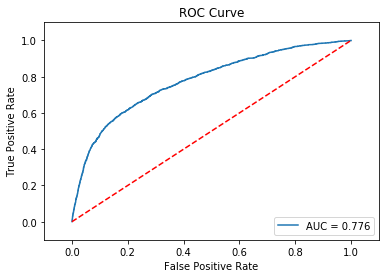

In [62]:
y_preds = clf.predict_proba(X_test)

# take the second column because the classifier outputs scores for
# the 0 class as well
preds = y_preds[:,1]

# fpr means false-positive-rate
# tpr means true-positive-rate
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

auc_score = metrics.auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc_score))

# it's helpful to add a diagonal to indicate where chance 
# scores lie (i.e. just flipping a coin)
plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.show()

In [63]:
n_features=43

plt.clf()
d = dict(zip(data.columns, clf.feature_importances_))

d['marriage'] = 0
d['sex'] = 0
d['education'] = 0

for n in range(0,3):
    d['marriage'] += d['marriage_{}'.format(n)]
    del(d['marriage_{}'.format(n)])

for n in range(1,3):
    d['sex'] += d['sex_{}'.format(n)]
    del(d['sex_{}'.format(n)])    
    
for n in range(0,7):
    d['education'] += d['education_{}'.format(n)]
    del(d['education_{}'.format(n)])

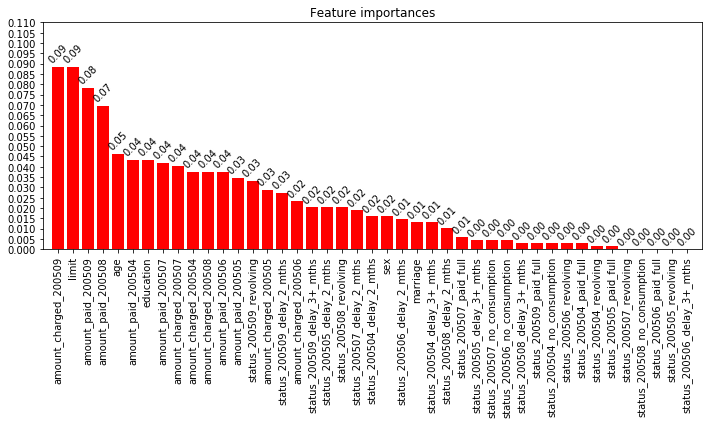

In [64]:
ss = sorted(d, key=d.get, reverse=True)
top_names = ss[0:n_features]

plt.title("Feature importances")
plt.bar(range(n_features), [d[i] for i in top_names], color="r", align="center")
plt.xlim(-1, n_features)
plt.xticks(range(n_features), top_names, rotation='vertical')
plt.yticks(np.arange(0, 0.12, 0.005))
plot_value_labels(plt.gca(),format='{:.3f}')
plt.gcf().set_size_inches(10,6)
plt.ylim(0.0,0.11)
plt.tight_layout()
plt.show()

## can we do better by training a different model by subpopulation?

In [65]:
df['age'].describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: age, dtype: float64

### young people (age<=30)

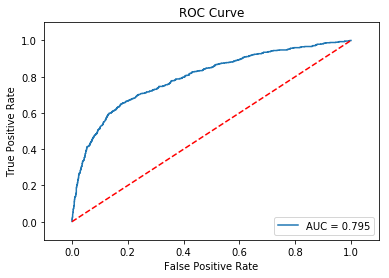

In [66]:
data = df[df['age']<=30].drop('default',axis=1)
target = df[df['age']<=30]['default']

X_train, X_test, y_train, y_test = train_test_split(
    data.values, 
    target.values, 
    test_size=0.25)

clf = XGBClassifier()
clf.fit(X_train, y_train.ravel())

y_preds = clf.predict_proba(X_test)

# take the second column because the classifier outputs scores for
# the 0 class as well
preds = y_preds[:,1]

# fpr means false-positive-rate
# tpr means true-positive-rate
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

auc_score = metrics.auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc_score))

# it's helpful to add a diagonal to indicate where chance 
# scores lie (i.e. just flipping a coin)
plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.show()

> solid gains here

## middle age (30 < age <=50)

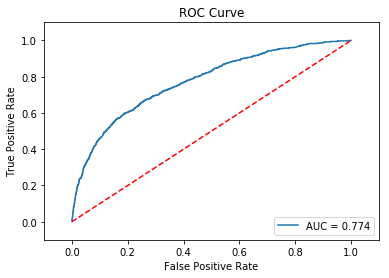

In [67]:
data = df[df['age'].between(31,50)].drop('default',axis=1)
target = df[df['age'].between(31,50)]['default']

X_train, X_test, y_train, y_test = train_test_split(
    data.values, 
    target.values, 
    test_size=0.25)

clf = XGBClassifier()
clf.fit(X_train, y_train.ravel())

y_preds = clf.predict_proba(X_test)

# take the second column because the classifier outputs scores for
# the 0 class as well
preds = y_preds[:,1]

# fpr means false-positive-rate
# tpr means true-positive-rate
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

auc_score = metrics.auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc_score))

# it's helpful to add a diagonal to indicate where chance 
# scores lie (i.e. just flipping a coin)
plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.show()

## older people (age > 50)

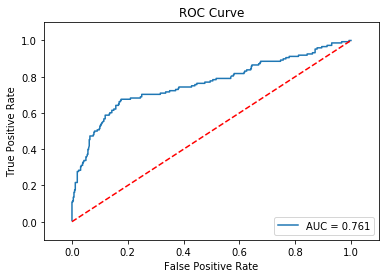

In [68]:
data = df[df['age'] > 50].drop('default',axis=1)
target = df[df['age'] > 50]['default']

X_train, X_test, y_train, y_test = train_test_split(
    data.values, 
    target.values, 
    test_size=0.25)

clf = XGBClassifier()
clf.fit(X_train, y_train.ravel())

y_preds = clf.predict_proba(X_test)

# take the second column because the classifier outputs scores for
# the 0 class as well
preds = y_preds[:,1]

# fpr means false-positive-rate
# tpr means true-positive-rate
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

auc_score = metrics.auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc_score))

# it's helpful to add a diagonal to indicate where chance 
# scores lie (i.e. just flipping a coin)
plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.show()

## men only

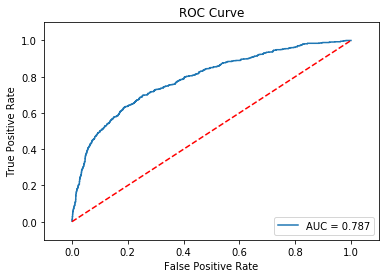

In [70]:
data = df[df['sex_1'] == 1].drop('default',axis=1)
target = df[df['sex_1'] == 1]['default']

X_train, X_test, y_train, y_test = train_test_split(
    data.values, 
    target.values, 
    test_size=0.25)

clf = XGBClassifier()
clf.fit(X_train, y_train.ravel())

y_preds = clf.predict_proba(X_test)

# take the second column because the classifier outputs scores for
# the 0 class as well
preds = y_preds[:,1]

# fpr means false-positive-rate
# tpr means true-positive-rate
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

auc_score = metrics.auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc_score))

# it's helpful to add a diagonal to indicate where chance 
# scores lie (i.e. just flipping a coin)
plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.show()

## women only

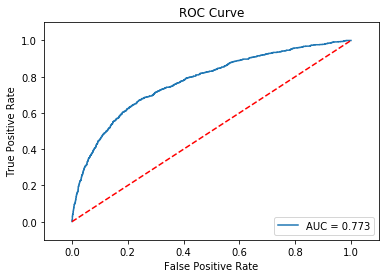

In [71]:
data = df[df['sex_2'] == 1].drop('default',axis=1)
target = df[df['sex_2'] == 1]['default']

X_train, X_test, y_train, y_test = train_test_split(
    data.values, 
    target.values, 
    test_size=0.25)

clf = XGBClassifier()
clf.fit(X_train, y_train.ravel())

y_preds = clf.predict_proba(X_test)

# take the second column because the classifier outputs scores for
# the 0 class as well
preds = y_preds[:,1]

# fpr means false-positive-rate
# tpr means true-positive-rate
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

auc_score = metrics.auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc_score))

# it's helpful to add a diagonal to indicate where chance 
# scores lie (i.e. just flipping a coin)
plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.show()